In [1]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import networkx as nx
import sys

from torch_geometric.datasets import TUDataset
from torch_geometric.utils import to_dense_adj

from preprocess import *
from utils import *
from model import *
from train import *

/Users/stella/anaconda3/envs/gdl/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load Dataset
dataset = TUDataset(root='data/TUDataset', name='Mutagenicity')

print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

torch.manual_seed(8)

# Train test split
train_split = 0.8
batch_size = 16
visual_batch_size = 200
train_loader, val_loader, test_loader, visual_data_loader = prepare_data(dataset, train_split, batch_size, visual_batch_size)


Dataset: Mutagenicity(4337):
Number of graphs: 4337
Number of features: 14
Number of classes: 2


Class split - Training 0: 1901 1: 1568, Validation 0: 247 1: 187, Test 0: 253 1: 181


Epoch 1, Train Loss: 2.5942, Val Loss: 0.7008, Val Acc: 0.6751
Epoch 2, Train Loss: 2.2372, Val Loss: 0.5724, Val Acc: 0.7120
Epoch 3, Train Loss: 2.0375, Val Loss: 0.5405, Val Acc: 0.7558
Epoch 4, Train Loss: 1.8671, Val Loss: 0.5547, Val Acc: 0.7120
Epoch 5, Train Loss: 1.6357, Val Loss: 0.4944, Val Acc: 0.7742
Epoch 6, Train Loss: 1.3313, Val Loss: 0.5153, Val Acc: 0.7304
Epoch 7, Train Loss: 1.0032, Val Loss: 0.5655, Val Acc: 0.7166
Epoch 8, Train Loss: 0.8763, Val Loss: 0.6016, Val Acc: 0.7696
Epoch 9, Train Loss: 0.7877, Val Loss: 0.4911, Val Acc: 0.7719
Epoch 10, Train Loss: 0.7278, Val Loss: 0.4902, Val Acc: 0.7581
Epoch 11, Train Loss: 0.6950, Val Loss: 0.4870, Val Acc: 0.7788
Epoch 12, Train Loss: 0.6646, Val Loss: 0.4342, Val Acc: 0.8111
Epoch 13, Train Loss: 0.6462, Val Loss: 0.5162, Val Acc: 0.7742
Epoch 14, Train Loss: 0.6243, Val Loss: 0.4326, Val Acc: 0.8111
Epoch 15, Train Loss: 0.6100, Val Loss: 0.4856, Val Acc: 0.8065
Epoch 16, Train Loss: 0.6062, Val Loss: 0.4598, V

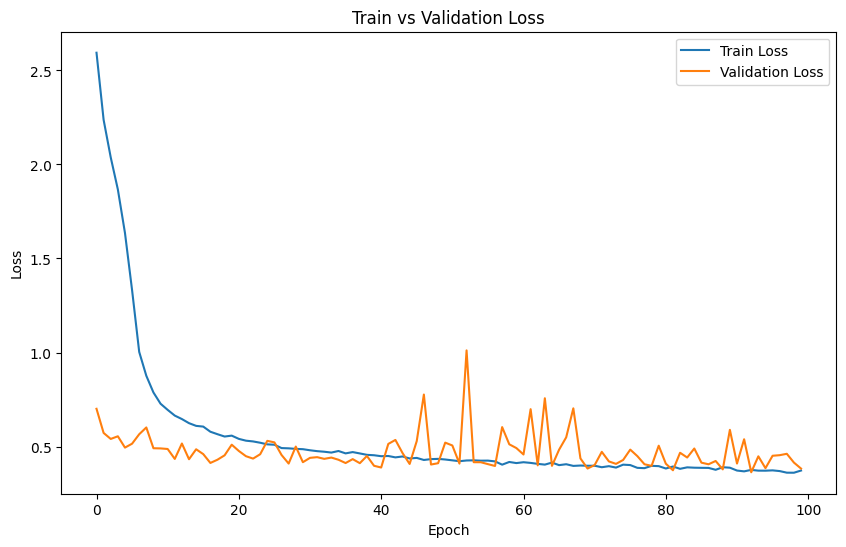

In [3]:
# Define the model
num_hidden_unit = 40
num_nodes1 = 12
model_chocolate = ChocolateGNN(dataset.num_features, num_hidden_unit, dataset.num_classes, num_nodes1)
model_checkpoint_chocolate = f'chocolate_model_{num_hidden_unit}_{num_nodes1}.pth'
model_type = 'chocolate'

# Training
lr = 0.001
epochs = 100
experiment_runner(model_chocolate, train_loader, val_loader, lr, epochs, model_checkpoint_chocolate, True, model_type)

In [4]:
model_chocolate_0 = ChocolateGNN(dataset.num_features, num_hidden_unit, dataset.num_classes, num_nodes1)
model_chocolate_0.load_state_dict(torch.load(model_checkpoint_chocolate))
model_chocolate_0.eval() 

criterion = torch.nn.CrossEntropyLoss()
test_loss, test_acc = test(model_chocolate_0, visual_data_loader, criterion, model_type)
print('Test Accuracy on Visual Data Loader:', test_acc)

Test Accuracy on Visual Data Loader: 0.8387096774193549
